In [528]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from utils.data_io import create_time_bins, get_cam_timestamps, load_ONE, get_experiment_path, get_dlc_df, get_rotary_position, temporally_align_variable, preprocess_dlc_data
from utils.behavioral_analysis import calculate_median_position
from utils.visualization import plot_single_session, plot_all_sessions, plot_sorted_spike_counts, plot_PCA, plot_correlation_distributions, plot_dlc_analyses
from utils.pipeline import load_and_process_session, analyze_single_session, analyze_multiple_sessions
from utils.statistical_testing import categorise_neurons
from utils.correlation_analysis import run_PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from types import SimpleNamespace as Bunch
import seaborn as sns
from scipy.stats import binned_statistic_2d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
subject_id = "AV043"
my_sessions = [
    ('AV043', '2024-03-04'),
    ('AV043', '2024-03-05'),
    ('AV043', '2024-03-08'),
    ('AV043', '2024-03-11'),
    ('AV043', '2024-03-13'),
    ('AV043', '2024-03-14'),
    ('AV043', '2024-03-26'),
    ('EB036', '2024-03-20'),
    ('EB036', '2024-03-22'),
    ('EB037', '2024-03-20'),
    ('EB037', '2024-03-21'),
    ('EB037', '2024-03-22'),
    ('GB011', '2024-05-09'),
    ('GB011', '2024-05-10'),
    ('GB011', '2024-05-14'),
    ('GB011', '2024-05-15'),
    ('GB011', '2024-05-16'),
    ('GB011', '2024-05-17'),
    ('GB012', '2024-06-20'),
    ('GB012', '2024-06-21'),
    ('GB012', '2024-06-25'),
    ('GB012', '2024-07-12'),
    ('GB012', '2024-07-16'),

    
]




    

In [370]:
subject_id = 'EB036'
date = '2024-03-20'

In [530]:
dlc_df = get_dlc_df(subject_id, date)

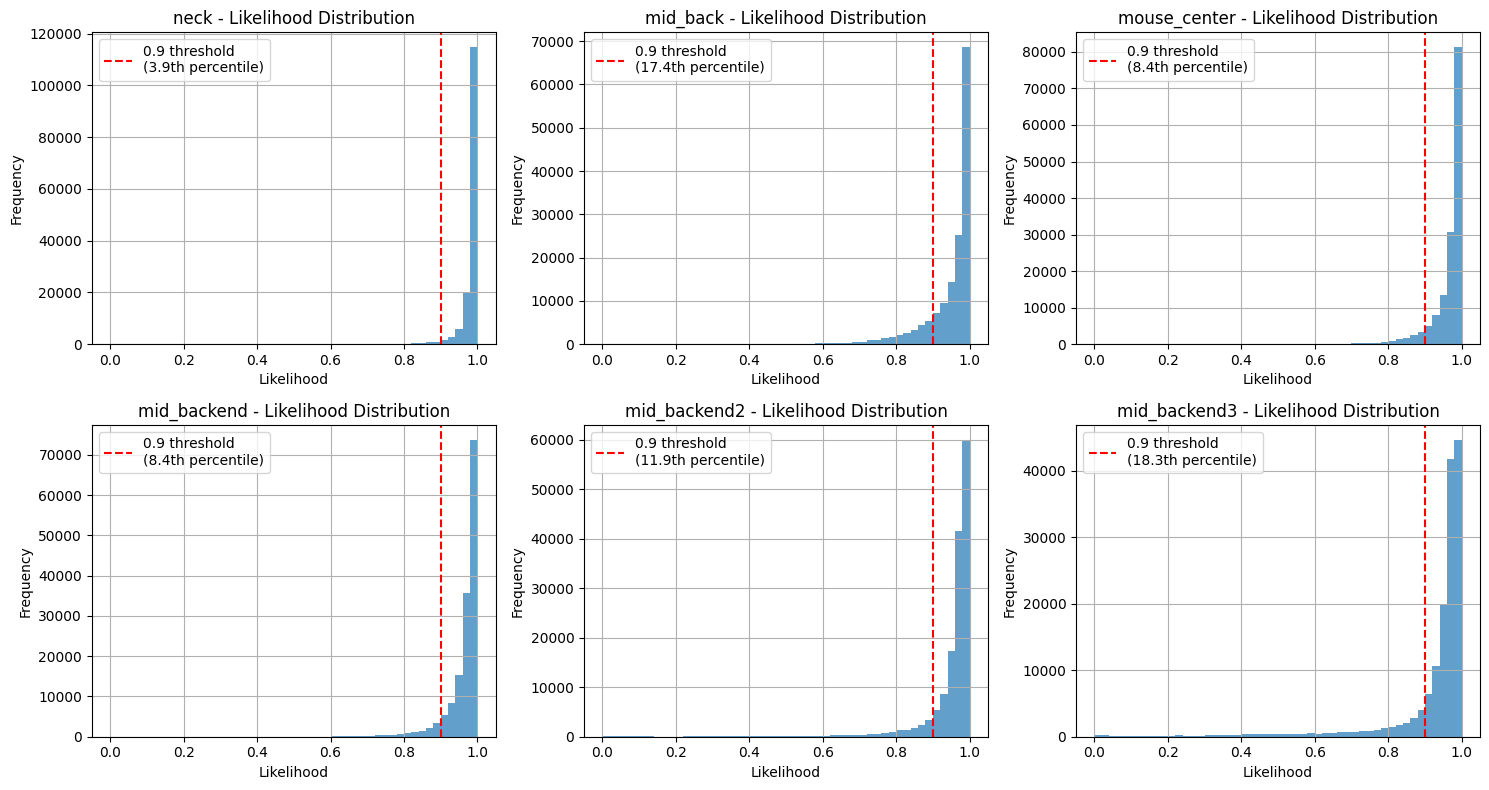

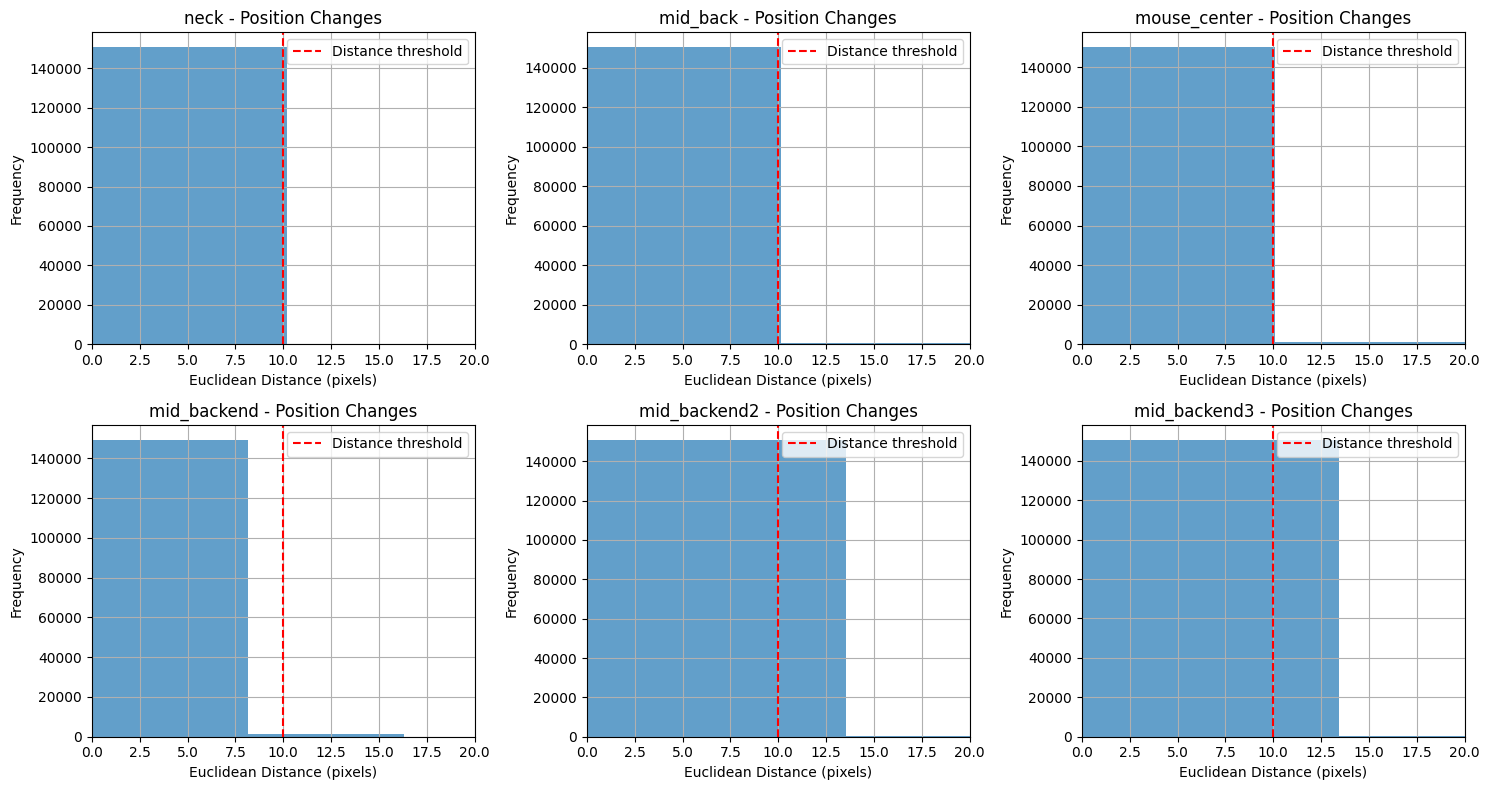

neck: 1437 NaN frames for x (1.0%)
neck: 1437 NaN frames for y (1.0%)
mid_back: 6803 NaN frames for x (4.5%)
mid_back: 6803 NaN frames for y (4.5%)
mouse_center: 1278 NaN frames for x (0.8%)
mouse_center: 1278 NaN frames for y (0.8%)
mid_backend: 1379 NaN frames for x (0.9%)
mid_backend: 1379 NaN frames for y (0.9%)
mid_backend2: 4288 NaN frames for x (2.8%)
mid_backend2: 4288 NaN frames for y (2.8%)
mid_backend3: 8225 NaN frames for x (5.4%)
mid_backend3: 8225 NaN frames for y (5.4%)


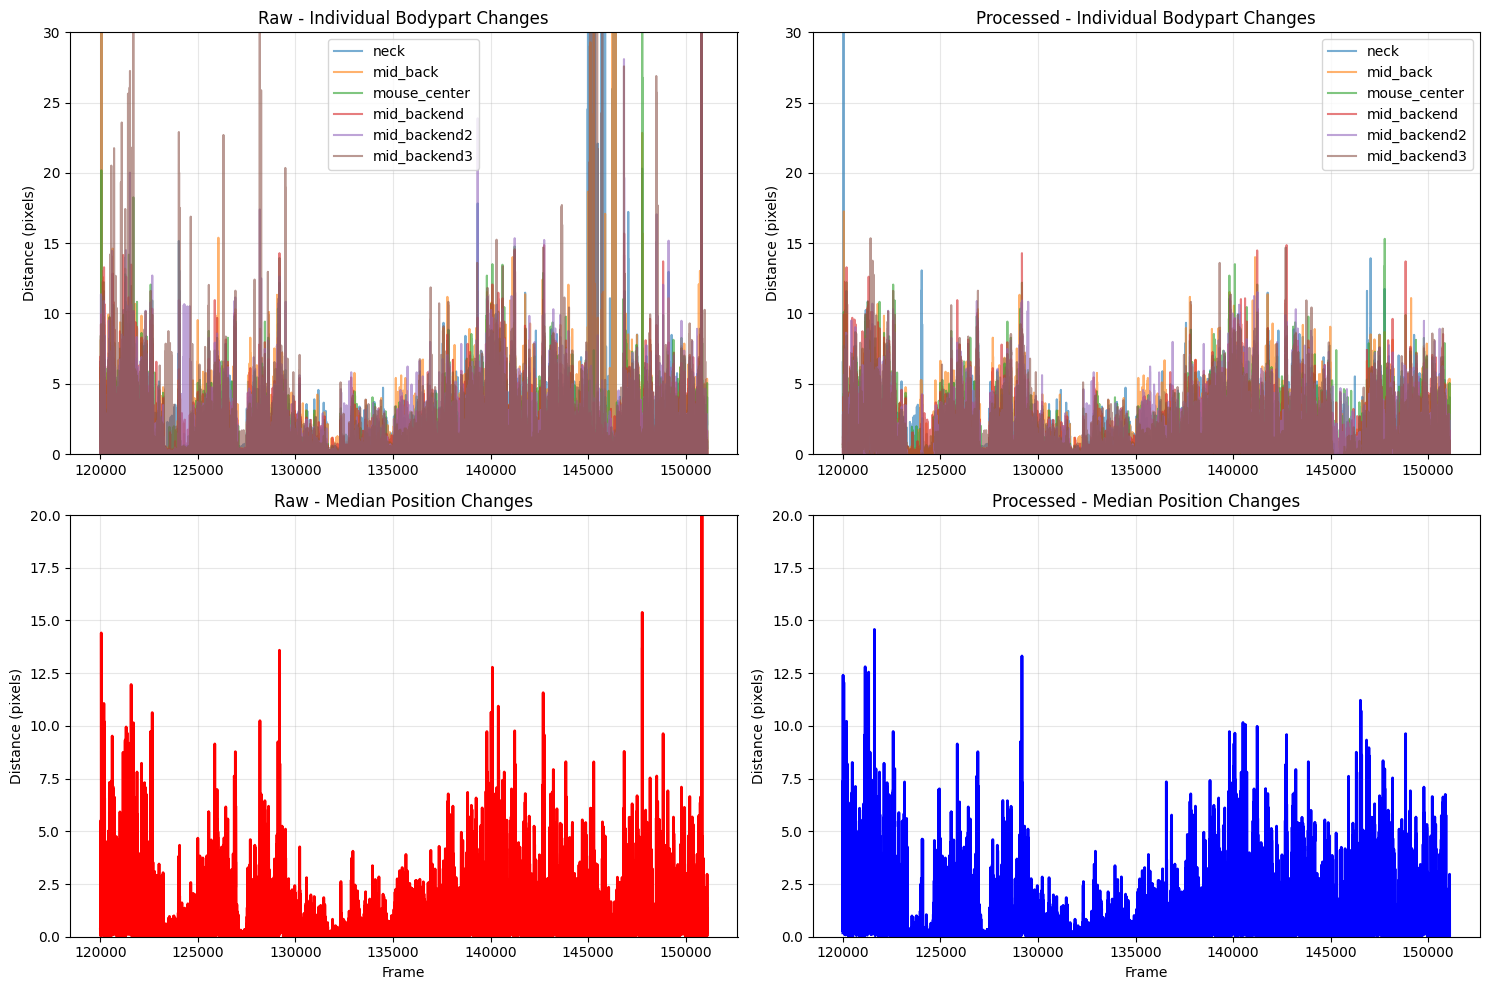

In [547]:
plot_dlc_analyses(dlc_df,w_start =120000, w_end=1300000)

neck: 1142 NaN frames for x (0.4%)
neck: 1142 NaN frames for y (0.4%)
mid_back: 1948 NaN frames for x (0.6%)
mid_back: 1948 NaN frames for y (0.6%)
mouse_center: 113 NaN frames for x (0.0%)
mouse_center: 113 NaN frames for y (0.0%)
mid_backend: 547 NaN frames for x (0.2%)
mid_backend: 547 NaN frames for y (0.2%)
mid_backend2: 9843 NaN frames for x (3.3%)
mid_backend2: 9843 NaN frames for y (3.3%)
mid_backend3: 49948 NaN frames for x (16.6%)
mid_backend3: 49948 NaN frames for y (16.6%)
Processing frame 10/10
=== Cross-validation debug ===
half point: 25072
First half wheel running: 8054
Second half wheel running: 10930
First half wheel speed range: 0.00 to 64.51
Second half wheel speed range: 0.00 to 74.07


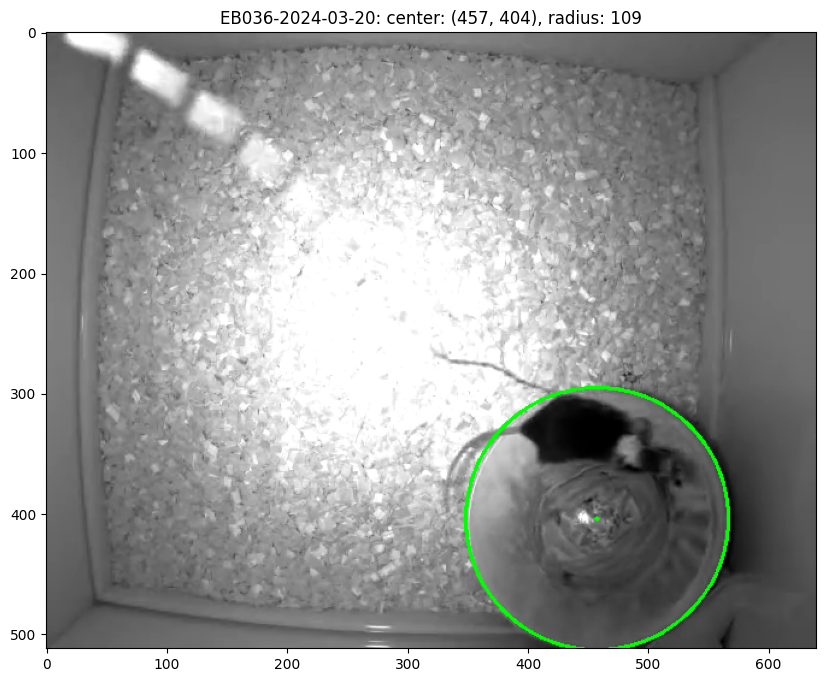

In [371]:
sesh =load_and_process_session(subject_id, date, target_freq=10)
sesh = analyze_single_session(sesh)



In [372]:
pctrajectories = run_PCA(sesh.spike_counts)

[Text(0.5, 0, 'PCA7'),
 Text(0, 0.5, 'PCA8'),
 Text(0.5, 1.0, 'Density in PC Space Arena')]

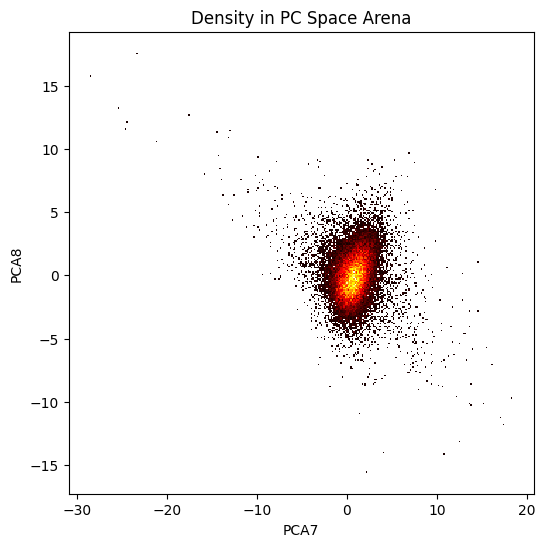

In [387]:
plt.figure(figsize=(6, 6))
oa_pc_density = sns.histplot(x=pctrajectories[sesh.oa_running, 6],y=pctrajectories[sesh.oa_running, 7], bins=300, stat="density", cmap="hot")
oa_pc_density.set(xlabel ="PCA7", ylabel = "PCA8", title ='Density in PC Space Arena')

[Text(0.5, 0, 'PCA1'),
 Text(0, 0.5, 'PCA2'),
 Text(0.5, 1.0, 'OA Speed Density in PC Space')]

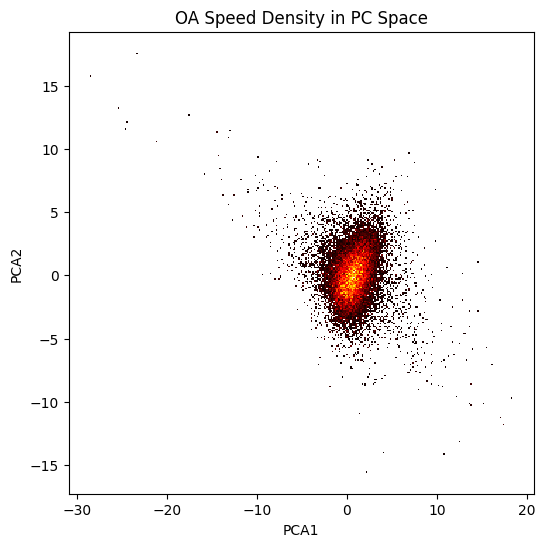

In [389]:
plt.figure(figsize=(6, 6))
oa_speed_density = sns.histplot(x=pctrajectories[sesh.oa_running, 6],y=pctrajectories[sesh.oa_running, 7], stat="density", weights=sesh.oa_speed[sesh.oa_running], bins=300, cmap="hot")
oa_speed_density.set(xlabel ="PCA1", ylabel = "PCA2", title ='OA Speed Density in PC Space')

[Text(0.5, 0, 'PC7'),
 Text(0, 0.5, 'PC8'),
 Text(0.5, 1.0, 'Density in PC Space Wheel')]

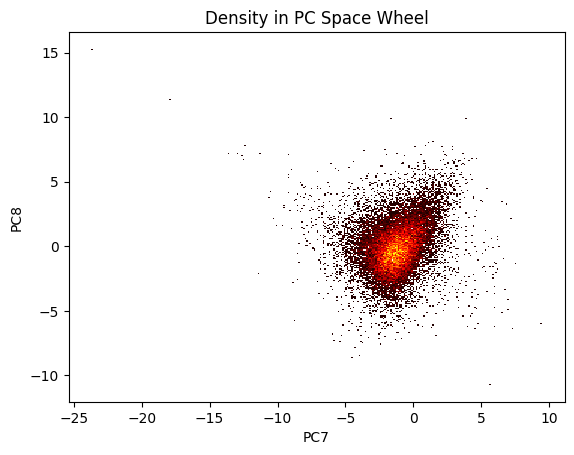

In [388]:
wh_pc_density = sns.histplot(x=pctrajectories[sesh.wh_running,6],y=pctrajectories[sesh.wh_running, 7],  bins=300, stat="density", cmap= "hot" )
wh_pc_density.set(xlabel ="PC7", ylabel = "PC8", title ='Density in PC Space Wheel')


[Text(0.5, 0, 'PCA1'),
 Text(0, 0.5, 'PCA2'),
 Text(0.5, 1.0, 'Wheel Velocity Density in PC Space')]

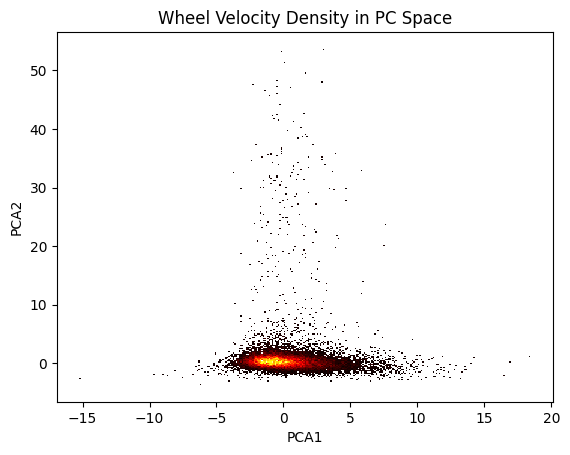

In [ ]:
wh_speed_density = sns.histplot(x=pctrajectories[sesh.wh_running, 6],y=pctrajectories[sesh.wh_running, 7], weights=sesh.wh_speed[sesh.wh_running], stat= "density", bins=300, cmap="hot")
wh_speed_density.set(xlabel ="PCA1", ylabel = "PCA2", title ='Wheel Velocity Density in PC Space')

In [ ]:
all_sessions = analyze_multiple_sessions(my_sessions)




In [ ]:
plot_all_sessions(all_sessions)

In [408]:
sesh = all_sessions[8]
print(len(sesh.context_invariant))
print(len(sesh.spike_counts))

564
564


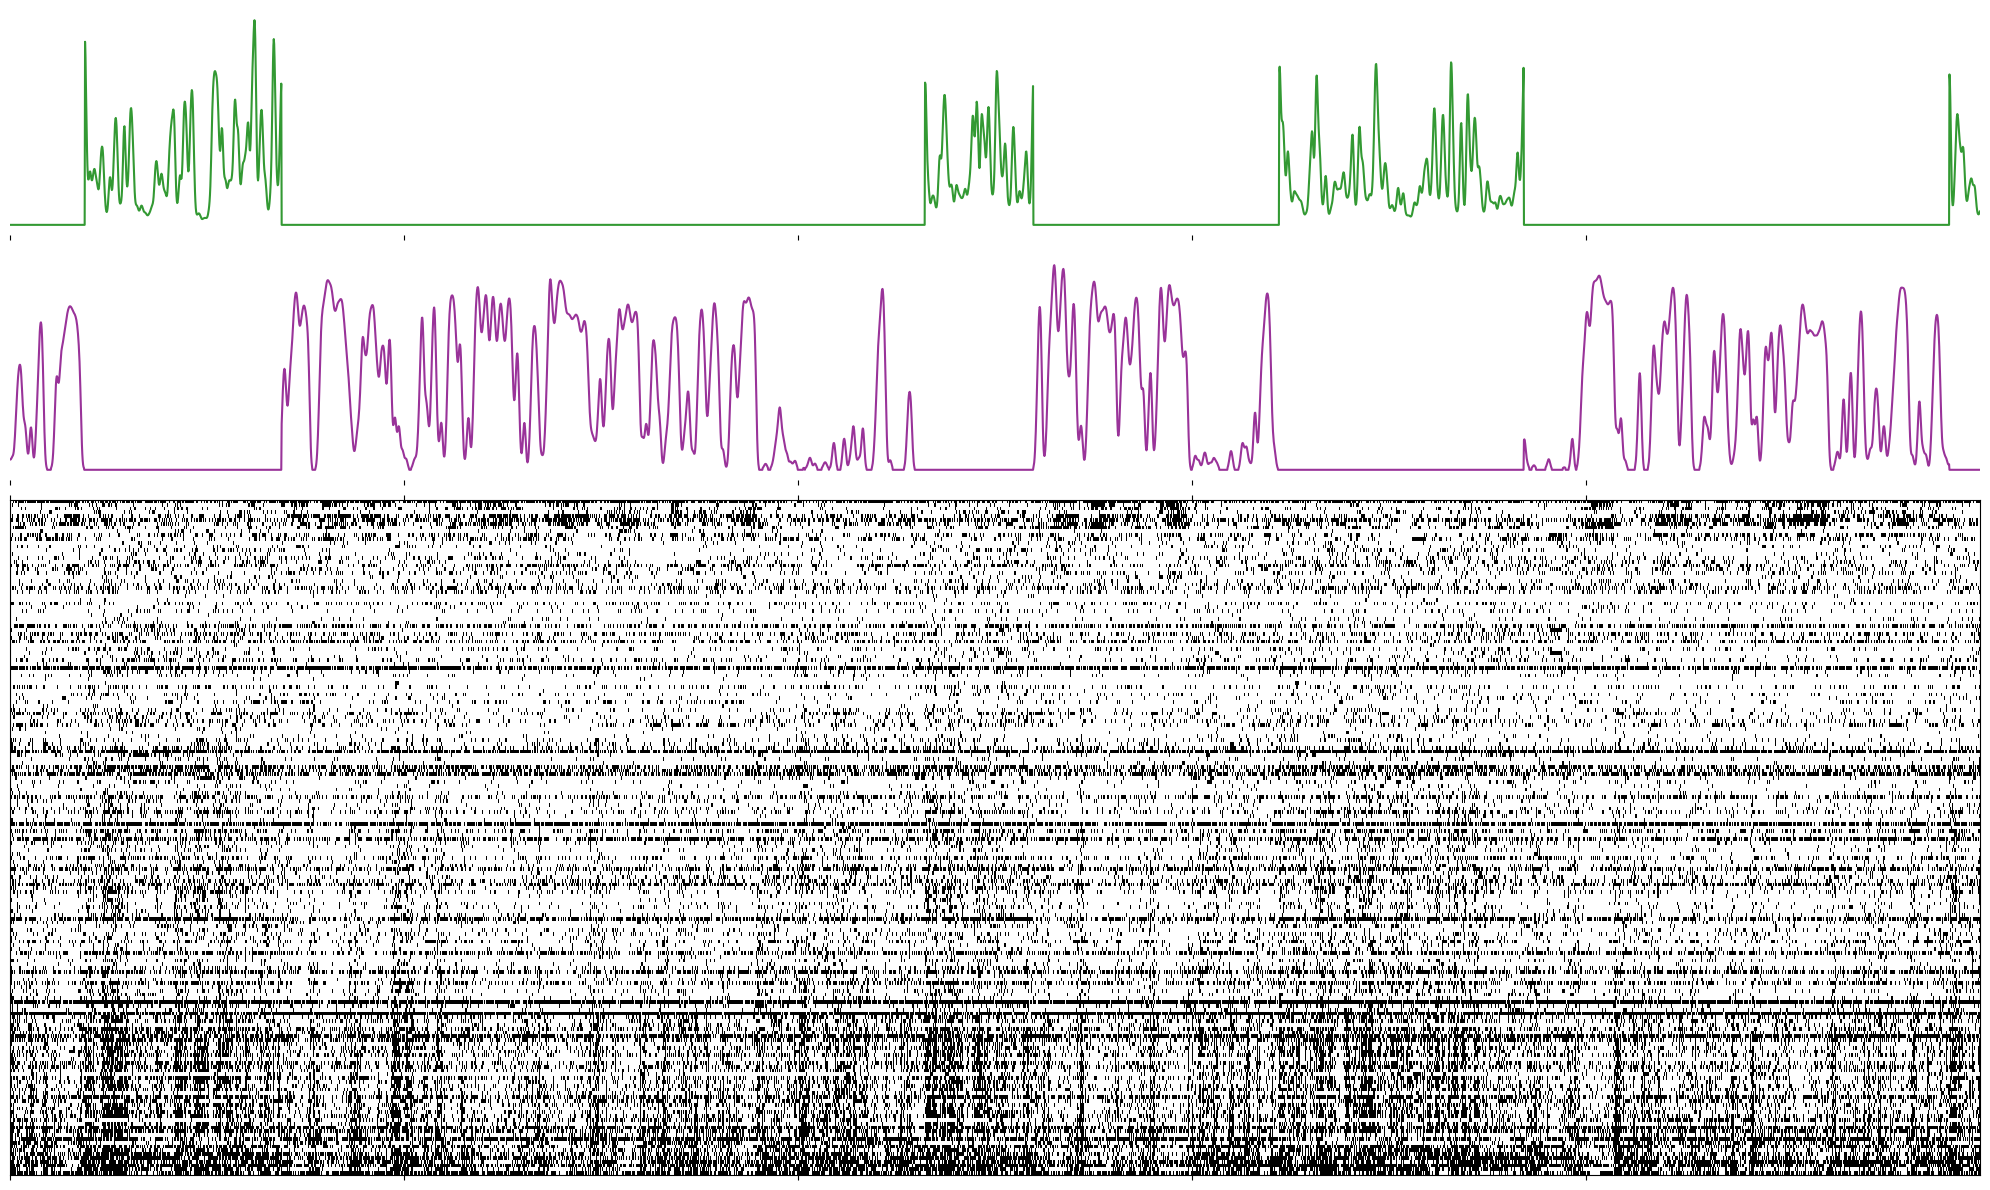

In [265]:


plot_sorted_spike_counts(sesh.r_wh[sesh.wheel_only], sesh.oa_speed, sesh.wh_speed, sesh.wh_running, sesh.oa_running, sesh.spike_counts[sesh.wheel_only,:], w_start=0, w_end=5000)



In [426]:
for session in all_sessions:
    n_neurons = session.spike_counts.shape[0]

    oa_speed_bins = np.linspace(0, np.nanmax(session.oa_speed), num=10)
    oa_speed_bin_centers = 0.5 * (oa_speed_bins[:-1] + oa_speed_bins[1:])
    wh_speed_bins = np.linspace(0, np.nanmax(session.wh_speed), num=10)
    wh_speed_bin_centers = 0.5 * (wh_speed_bins[:-1] + wh_speed_bins[1:])


    oa_firing_rates = np.zeros((n_neurons, len(oa_speed_bin_centers)))
    oa_speed_indices = np.digitize(session.oa_speed, oa_speed_bins) -1
    wh_firing_rates = np.zeros((n_neurons, len(wh_speed_bin_centers)))
    wh_speed_indices = np.digitize(session.wh_speed, wh_speed_bins) -1

    dt = 0.1


    for i in range (len(oa_speed_bin_centers)):
        idx =oa_speed_indices == i
        if np.any(idx):
            occupancy = np.sum(idx) * dt
            spikes_in_bin = session.spike_counts[:,idx].sum(axis=1)
            oa_firing_rates[:,i] = spikes_in_bin / occupancy
        else:
            oa_firing_rates[:,i] = np.nan


    for i in range (len(wh_speed_bin_centers)):
        idx =wh_speed_indices == i
        if np.any(idx):
            occupancy = np.sum(idx) * dt
            spikes_in_bin = session.spike_counts[:,idx].sum(axis=1)
            wh_firing_rates[:,i] = spikes_in_bin / occupancy
        else:
            wh_firing_rates[:,i] = np.nan

    slopes_oa = np.zeros(n_neurons)
    offsets_oa = np.zeros(n_neurons)
    r2_oa = np.zeros(n_neurons)
    slopes_wh = np.zeros(n_neurons)
    offsets_wh = np.zeros(n_neurons)
    r2_wh = np.zeros(n_neurons)

    for neuron in range(n_neurons):

        valid_oa = ~np.isnan(oa_firing_rates[neuron])
        valid_wh = ~np.isnan(wh_firing_rates[neuron])

        if np.sum(valid_oa) > 3:
            slopes_oa[neuron], offsets_oa[neuron] = np.polyfit(oa_speed_bin_centers[valid_oa], oa_firing_rates[neuron, valid_oa], 1)
            r2_oa[neuron] =1 - np.sum((oa_firing_rates[neuron, valid_oa] - (slopes_oa[neuron] * oa_speed_bin_centers[valid_oa] + offsets_oa[neuron]))**2) / np.sum((oa_firing_rates[neuron, valid_oa] - np.nanmean(oa_firing_rates[neuron, valid_oa]))**2)
        
        else:
            slopes_oa[neuron] = np.nan
            offsets_oa[neuron] = np.nan
            r2_oa[neuron] = np.nan

        if np.sum(valid_wh) > 3:
            slopes_wh[neuron], offsets_wh[neuron] = np.polyfit(wh_speed_bin_centers[valid_wh], wh_firing_rates[neuron, valid_wh], 1)
            r2_wh[neuron] =1 - np.sum((wh_firing_rates[neuron, valid_wh] - (slopes_wh[neuron] * wh_speed_bin_centers[valid_wh] + offsets_wh[neuron]))**2) / np.sum((wh_firing_rates[neuron, valid_wh] - np.nanmean(wh_firing_rates[neuron, valid_wh]))**2)
        
        else:
            slopes_wh[neuron] = np.nan
            offsets_wh[neuron] = np.nan
            r2_wh[neuron] = np.nan

    session.oa_slope = slopes_oa
    session.oa_offset = offsets_oa
    session.oa_r2 = r2_oa
    session.wh_slope = slopes_wh
    session.wh_offset = offsets_wh
    session.wh_r2 = r2_wh


In [ ]:
for session in all_sessions:
    n_neurons = session.spike_counts.shape[0]

slopes_oa = np.zeros(n_neurons)
offsets_oa = np.zeros(n_neurons)
r2_oa = np.zeros(n_neurons)
slopes_wh = np.zeros(n_neurons)
offsets_wh = np.zeros(n_neurons)
r2_wh = np.zeros(n_neurons)

for neuron in range(n_neurons):

    valid_oa = ~np.isnan(oa_firing_rates[neuron])
    valid_wh = ~np.isnan(wh_firing_rates[neuron])

    if np.sum(valid_oa) > 3:
        slopes_oa[neuron], offsets_oa[neuron] = np.polyfit(oa_speed_bin_centers[valid_oa], oa_firing_rates[neuron, valid_oa], 1)
        r2_oa[neuron] =1 - np.sum((oa_firing_rates[neuron, valid_oa] - (slopes_oa[neuron] * oa_speed_bin_centers[valid_oa] + offsets_oa[neuron]))**2) / np.sum((oa_firing_rates[neuron, valid_oa] - np.nanmean(oa_firing_rates[neuron, valid_oa]))**2)
        
    else:
        slopes_oa[neuron] = np.nan
        offsets_oa[neuron] = np.nan
        r2_oa[neuron] = np.nan

    if np.sum(valid_wh) > 3:
        slopes_wh[neuron], offsets_wh[neuron] = np.polyfit(wh_speed_bin_centers[valid_wh], wh_firing_rates[neuron, valid_wh], 1)
        r2_wh[neuron] =1 - np.sum((wh_firing_rates[neuron, valid_wh] - (slopes_wh[neuron] * wh_speed_bin_centers[valid_wh] + offsets_wh[neuron]))**2) / np.sum((wh_firing_rates[neuron, valid_wh] - np.nanmean(wh_firing_rates[neuron, valid_wh]))**2)
        
    else:
        slopes_wh[neuron] = np.nan
        offsets_wh[neuron] = np.nan
        r2_wh[neuron] = np.nan

    session.oa_slope = slopes_oa
    session.oa_offset = offsets_oa
    session.oa_r2 = r2_oa
    session.wh_slope = slopes_wh
    session.wh_offset = offsets_wh
    session.wh_r2 = r2_wh


In [526]:
explore = all_sessions[7]
subject_id = explore.subject_id
date = explore.date
print(f"Exploring session for {subject_id} on {date}")

Exploring session for EB037 on 2024-03-20


Text(0.5, 1.0, 'Intercept Comparison')

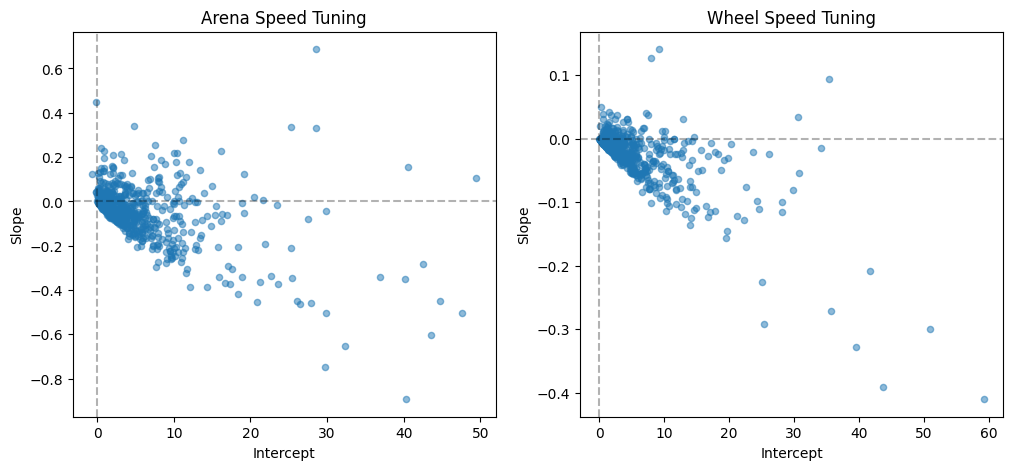

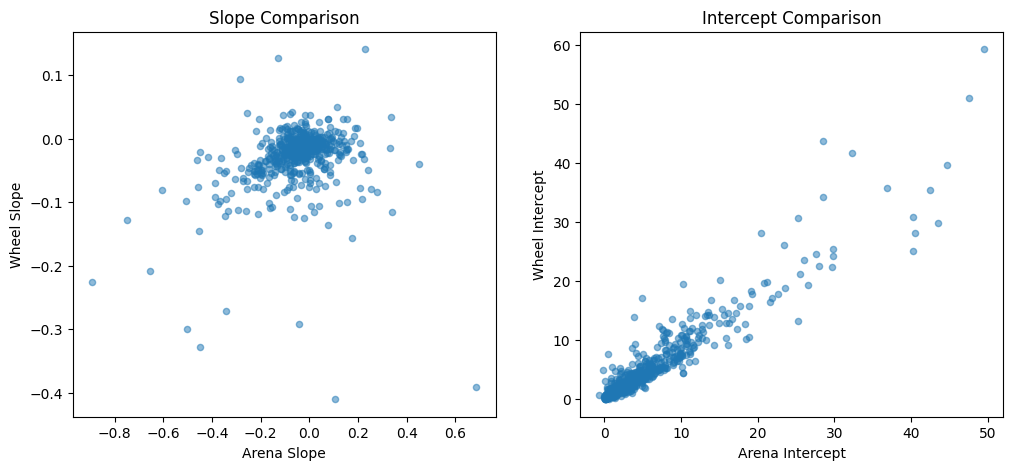

In [518]:



    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#well_fit = (explore.oa_r2 > 0.5) | (explore.wh_r2 > 0.5)

# Arena tuning
ax1.scatter(explore.oa_offset, explore.oa_slope, alpha=0.5, s=20)
ax1.axhline(0, color='k', linestyle='--', alpha=0.3)
ax1.axvline(0, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('Intercept')
ax1.set_ylabel('Slope')
ax1.set_title('Arena Speed Tuning')

# Wheel tuning
ax2.scatter(explore.wh_offset, explore.wh_slope, alpha=0.5, s=20)
ax2.axhline(0, color='k', linestyle='--', alpha=0.3)
ax2.axvline(0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('Intercept')
ax2.set_ylabel('Slope')
ax2.set_title('Wheel Speed Tuning')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Compare slopes across contexts
ax1.scatter(explore.oa_slope, explore.wh_slope, alpha=0.5, s=20)
ax1.set_xlabel('Arena Slope')
ax1.set_ylabel('Wheel Slope')
ax1.set_title('Slope Comparison')

# Compare offsets across contexts
ax2.scatter(explore.oa_offset, explore.wh_offset, alpha=0.5, s=20)
ax2.set_xlabel('Arena Intercept')
ax2.set_ylabel('Wheel Intercept')
ax2.set_title('Intercept Comparison')



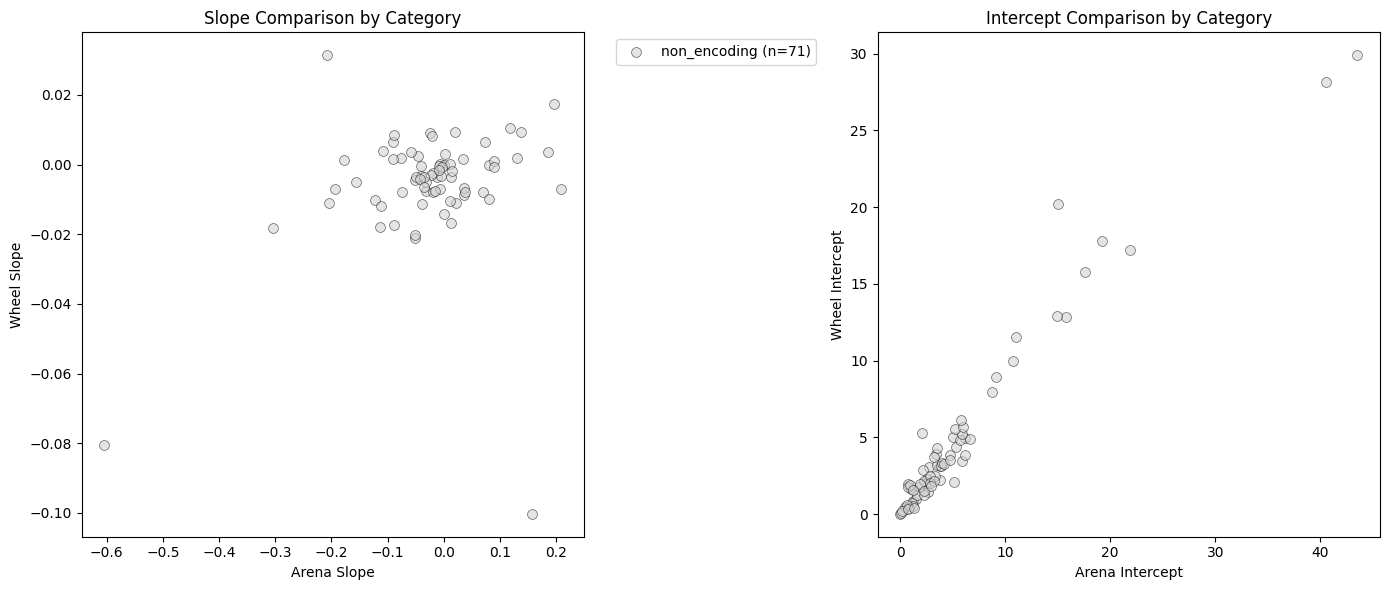

In [524]:
# Define colors for each category
colors = {
    #'context_invariant': 'black',
    #'arena_only': 'green', 
    #'wheel_only': 'purple',
    #'context_switching': 'orange',
    'non_encoding': 'lightgray'
}


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot each category separately
for cat, color in colors.items():
    if hasattr(explore, cat):
        mask = getattr(explore, cat) #& well_fit
        if np.sum(mask) > 0:
            ax1.scatter(explore.oa_slope[mask], explore.wh_slope[mask], 
                       c=color, label=f'{cat} (n={np.sum(mask)})', 
                       alpha=0.6, s=50, edgecolor='k', linewidth=0.5)

            ax2.scatter(explore.oa_offset[mask], explore.wh_offset[mask], 
                       c=color, alpha=0.6, s=50, edgecolor='k', linewidth=0.5)


ax1.set_xlabel('Arena Slope')
ax1.set_ylabel('Wheel Slope')
ax1.set_title('Slope Comparison by Category')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

max_offset = np.nanmax(np.concatenate([explore.oa_offset, explore.wh_offset]))
ax2.set_xlabel('Arena Intercept')
ax2.set_ylabel('Wheel Intercept')
ax2.set_title('Intercept Comparison by Category')

plt.tight_layout()